## 학습된 yolo 모델을 사용하는 방법
학습된 yolo모델을 사용해서 test 이미지를 predict하는 과정에 대해서 기술합니다. 

In [1]:
%pylab inline
from ultralytics import YOLO

import os
import cv2
import yaml
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_pridic(out, r=None):
    image = out.orig_img.copy()
    if r == None:
        r = (0,out.boxes.shape[0])
    for i in range(*r):
        p = list(np.array(out.boxes.xyxy[i].cpu(), dtype=int))
        image = cv2.rectangle(image, tuple(p[:2]), tuple(p[2:]),(255,0,0), 2, cv2.LINE_8)
        image = cv2.putText(image, f"{round(out.boxes.conf[i].cpu().item(),2)}", (p[0], p[3] - int((p[3] -p[1])/2) + 15), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255),1)
    fig = plt.figure(figsize=(13,13))
    imshow(image)

### 학습된 모델 불러오기 
학습된 모델은 runs 아래에 저장됩니다. 보통의 경우 last.pt와 best.pt가 저장되는데 최종 학습이 끝났을 때의 모델이 last.pt 학습 과정중 가장 좋은 성능을 낸 모델이 best.pt에 저장 됩니다. 

In [3]:
model = YOLO('best.pt')

predict는 이미지또는 폴더를 지정하고 원하는 confidence 값을 넣어주면 설정한 conf값 이상인 결과만 출력해 줍니다. 

In [4]:
out = model.predict(
   source='test_origin/',
   conf=0.01
)


image 1/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS1.png: 640x640 4 pseudanabaenas, 30.6ms
image 2/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS10.png: 640x640 10 pseudanabaenas, 32.1ms
image 3/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS2.png: 640x640 5 pseudanabaenas, 29.7ms
image 4/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS3.png: 640x640 6 pseudanabaenas, 30.3ms
image 5/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS4.png: 640x640 8 pseudanabaenas, 29.6ms
image 6/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS5.png: 640x640 6 pseudanabaenas, 28.2ms
image 7/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS6.png: 640x640 12 pseudanabaenas, 24.3ms
image 8/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS7.png: 640x640 3 pseudanabaenas, 25.3ms
image 9/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS8.png: 640x640 17 pseudanabaenas, 25.2ms
image 10/10 /home/etriai04/Downloads/Pseudanabaena/test_ori

### 결과 확인
폴더를 넣어줬을 경우 폴더에 있는 모든 이미지에 대해서 prediction 결과를 내어줍니다. 
각 이미지에서 특정 conf이상의 결과만 그려봅니다.

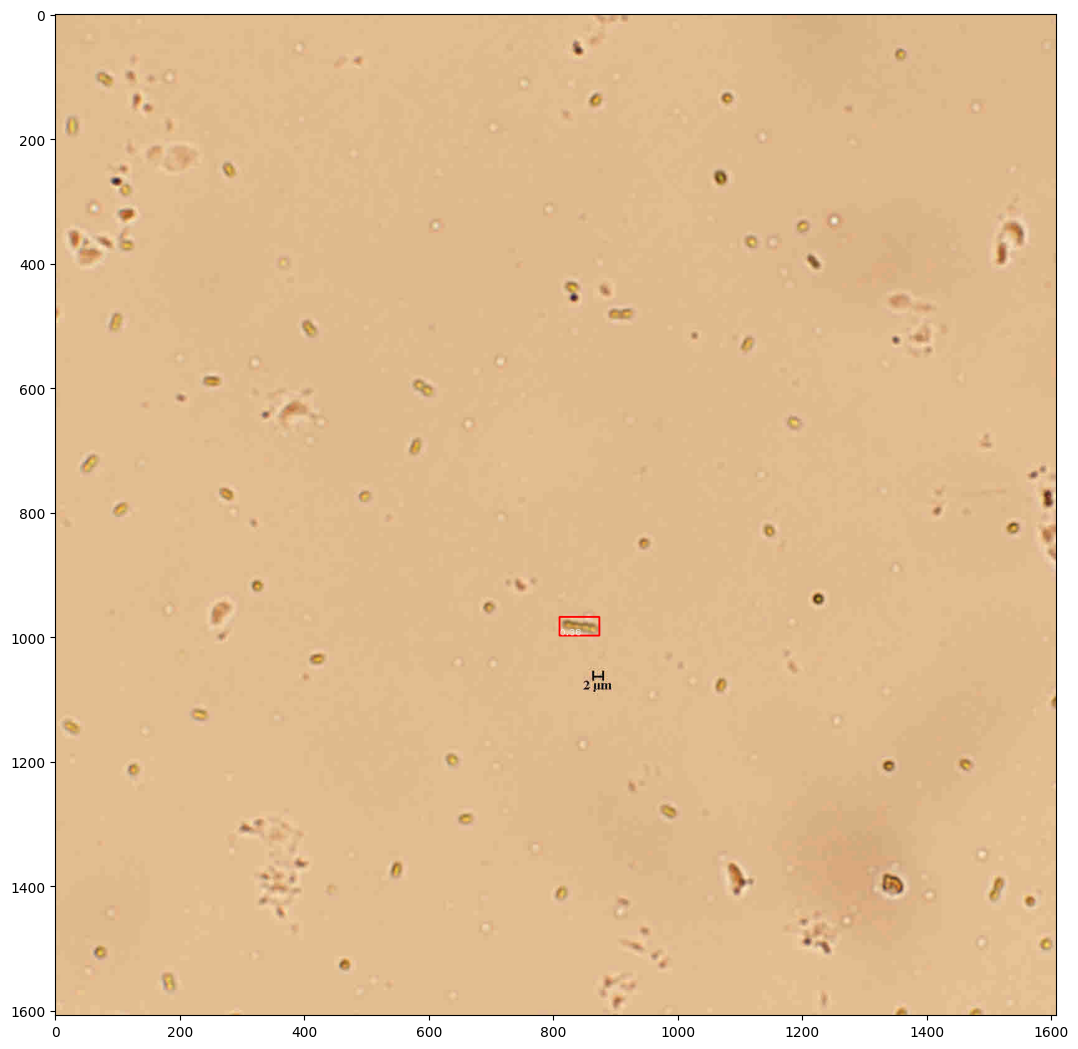

In [7]:
n = 0
conf = 0.15
plot_pridic(out[n],(0, out[n].boxes.conf[out[n].boxes.conf > conf].shape[0]))

In [28]:
model = YOLO('./best.pt')
out2 = model.predict(
   source='test_origin/',
   conf=0.01
)


image 1/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS1.png: 640x640 4 pseudanabaenas, 30.7ms
image 2/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS10.png: 640x640 10 pseudanabaenas, 31.7ms
image 3/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS2.png: 640x640 5 pseudanabaenas, 31.5ms
image 4/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS3.png: 640x640 6 pseudanabaenas, 27.9ms
image 5/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS4.png: 640x640 8 pseudanabaenas, 24.3ms
image 6/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS5.png: 640x640 6 pseudanabaenas, 23.7ms
image 7/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS6.png: 640x640 12 pseudanabaenas, 23.9ms
image 8/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS7.png: 640x640 3 pseudanabaenas, 24.5ms
image 9/10 /home/etriai04/Downloads/Pseudanabaena/test_origin/TS8.png: 640x640 17 pseudanabaenas, 25.5ms
image 10/10 /home/etriai04/Downloads/Pseudanabaena/test_ori

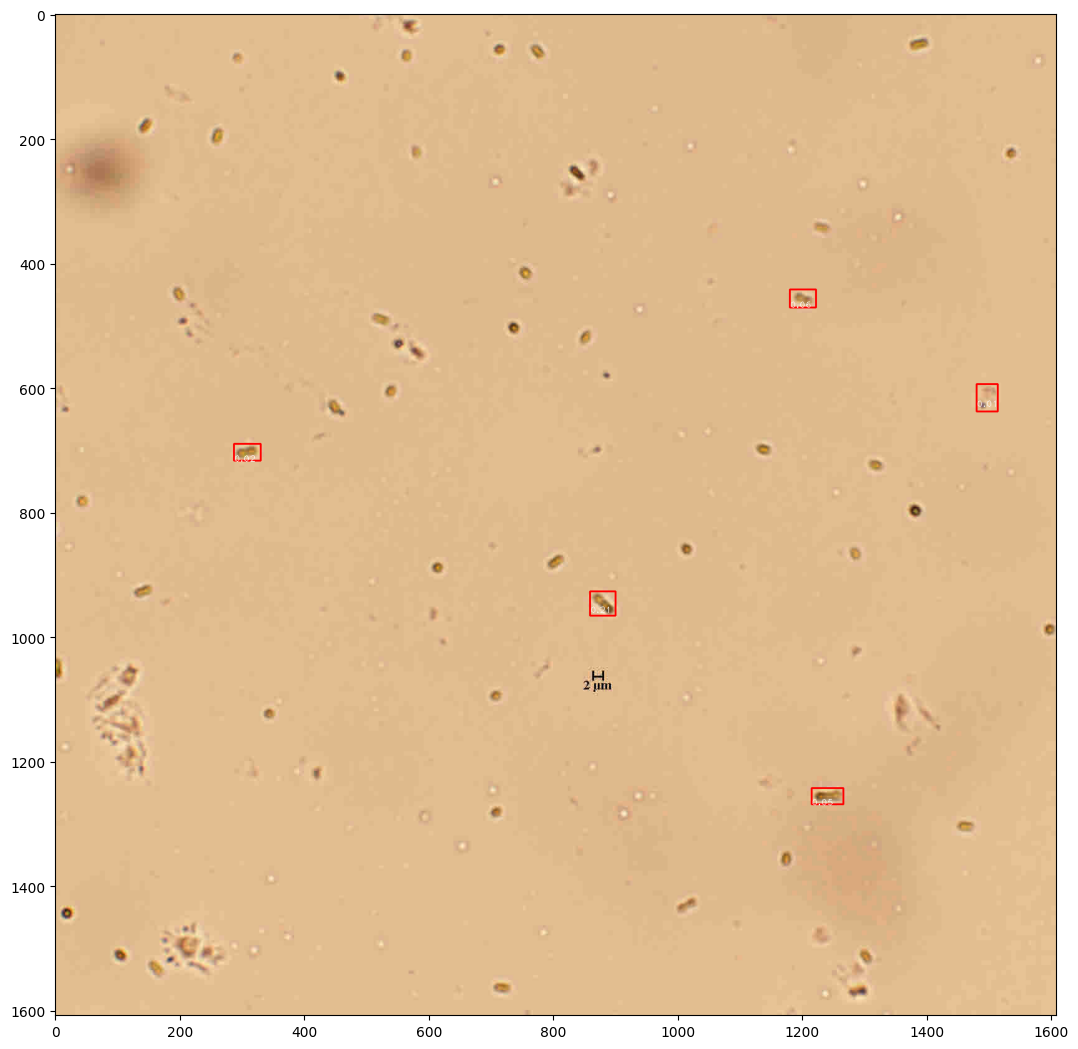

In [31]:
n = 2
conf = 0.01
plot_pridic(out2[n],(0, out2[n].boxes.conf[out2[n].boxes.conf > conf].shape[0]))

### 결과 출력하기 
prediction한 결과를 파일 형태로 출력합니다. 

In [12]:
tmp = []
for result in out:
        boxes = result.boxes.cpu().numpy()
        for box in boxes:
            cls = int(box.cls[0])
            path = result.path
            class_name = model.names[cls]
            conf = int(box.conf[0]*100)
            bx = box.xywh.tolist()
            df = pd.DataFrame({'path': path,'class_name': class_name, 'class_id': cls, 'confidence': conf, 'box_coord': bx})
            tmp.append(df)
df = pd.concat(tmp)

df.to_csv('predicted_labels.csv', index=False)

In [13]:
for result in out:
    boxes = result.boxes.cpu().numpy()
    file_name = result.path.split('/')[-1].split('.')[0]+'.txt'
    with open(file_name, 'w') as f:
        for box in boxes:
            cls = int(box.cls[0])
            path = result.path
            class_name = model.names[cls]
            conf = int(box.conf[0]*100)
            bx = box.xywhn.tolist()
            tmp = f"{cls} {bx[0][0]:.6f} {bx[0][1]:.6f} {bx[0][2]:.6f} {bx[0][3]:.6f}\n"
            f.write(tmp)
    

In [51]:
cell_model = YOLO('../cell_count_data/runs/detect/train/weights/best.pt')

In [42]:
ll = np.array(out[0].boxes.xyxy.cpu(), dtype=int)

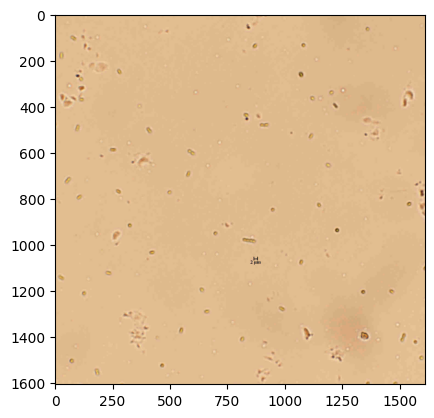

In [46]:
imshow(out[0].orig_img)

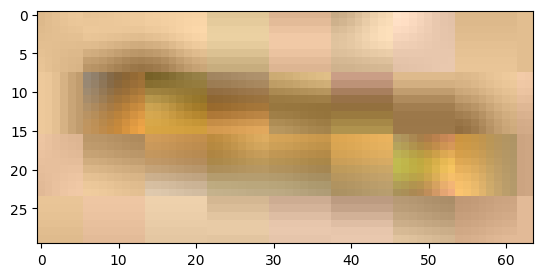

In [49]:
b = ll[0]
img = out[0].orig_img[b[1]:b[3], b[0]:b[2]]
imshow(img)

In [54]:
o = cell_model.predict(img, conf=0.01)


0: 320x640 300 pseudanabaenas, 24.1ms
Speed: 19.4ms preprocess, 24.1ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 640)


In [58]:
ttt =o[0].boxes.boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


In [59]:
ttt.shape

torch.Size([300, 6])